## Dimensionality Reduction

In [11]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [12]:
# Loading data
path = '.'
def load_dataset():
    csv_path= os.path.join(path,'diabetes.csv')
    return pd.read_csv(csv_path)
dataset = load_dataset()

# Imputation with median strategy
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values = 0, strategy = 'median')
dataset.iloc[:,1:6] = pd.DataFrame(imputer_median.fit_transform(dataset.values[:, 1:6]), # ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
                               columns=dataset.columns.values[1:6])

# Create features and labels 
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

# Create training and test set 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=123)

# Data up-sampling
from sklearn.utils import resample

df = pd.concat([features_train,labels_train],axis=1)
df.rename(columns={'Outcome':'balance'}, inplace=True)

# Separate majority (n=367) and minority (n=209) classes
df_majority = df[df['balance']==0] 
df_minority = df[df['balance']==1]

# Upsample samples with replacement for minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True, # sample with replacement
                                 n_samples=381, # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.balance.value_counts()

# re-preparing the training sets
features_train = df_upsampled.drop(['balance'], axis=1)
labels_train = df_upsampled[['balance']]
labels_train.rename(columns={'balance':'Outcome'}, inplace=True)

# Implement scaling using standardiation
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
features_train_std = standardScaler.fit_transform(features_train)
features_test_std = standardScaler.transform(features_test)

In [6]:
from sklearn.decomposition import PCA
# initialize pca with 2 components
pca = PCA(n_components=2)

# fit data
pca_data = pca.fit_transform(features_train_std)
print(pca.explained_variance_ratio_)

# Total Variance explained by principal components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 2 principal components')

[0.2732806  0.21257684]
48.6% of total variance is explained by 2 principal components


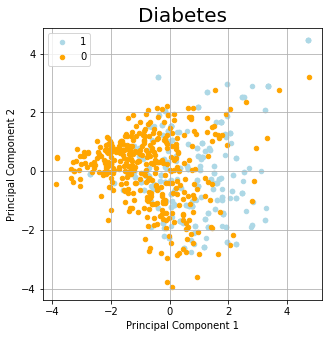

In [7]:
principalDf = pd.DataFrame(pca_data, columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf, labels_train.reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Diabetes', fontsize = 20) 

targets = [1, 0]
colors = ['lightblue', 'orange']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

[0.2732806  0.21257684 0.13909318]
62.5% of total variance is explained by 3 principal components


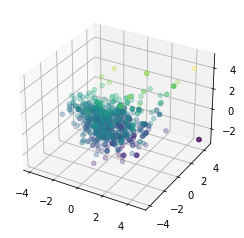

In [8]:
# initialize pca with 3 components
pca = PCA(n_components=3)

# fit data
pca_data = pca.fit_transform(features_train_std)
print(pca.explained_variance_ratio_)

# Total Variance explained by principal components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 3 principal components')

ax = plt.axes(projection='3d')
ax.scatter3D(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.3, c=pca_data[:, 2])

In [9]:
# initialize pca with 4 components
pca = PCA(n_components=4)

# fit data
pca_data = pca.fit_transform(features_train_std)
print(pca.explained_variance_ratio_)

# Total Variance explained by principal components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 4 principal components')

[0.2732806  0.21257684 0.13909318 0.11195185]
73.7% of total variance is explained by 4 principal components


In [10]:
# initialize pca with 5 components
pca = PCA(n_components=5)

# fit data
pca_data = pca.fit_transform(features_train_std)
print(pca.explained_variance_ratio_)

# Total Variance explained by principal components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 5 principal components')

[0.2732806  0.21257684 0.13909318 0.11195185 0.09662833]
83.4% of total variance is explained by 5 principal components
